# פטר והזאב: מבוא ללמידת חיזוק

במדריך זה נלמד כיצד ליישם למידת חיזוק לבעיה של מציאת מסלול. ההקשר שאוב מהאגדה המוזיקלית [פטר והזאב](https://en.wikipedia.org/wiki/Peter_and_the_Wolf) מאת המלחין הרוסי [סרגיי פרוקופייב](https://en.wikipedia.org/wiki/Sergei_Prokofiev). זהו סיפור על פטר, חלוץ צעיר ואמיץ, שיוצא מביתו לקרחת היער כדי לרדוף אחרי זאב. אנו נאמן אלגוריתמים של למידת מכונה שיעזרו לפטר לחקור את האזור הסובב אותו ולבנות מפה אופטימלית לניווט.

ראשית, נייבא כמה ספריות שימושיות:


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import random
import math

## סקירה כללית של למידת חיזוק

**למידת חיזוק** (RL) היא טכניקת למידה שמאפשרת לנו ללמוד התנהגות אופטימלית של **סוכן** בתוך **סביבה** מסוימת על ידי ביצוע ניסויים רבים. סוכן בסביבה זו צריך שיהיה לו **מטרה**, שמוגדרת על ידי **פונקציית תגמול**.

## הסביבה

לשם פשטות, נניח שהעולם של פיטר הוא לוח מרובע בגודל `width` x `height`. כל תא בלוח הזה יכול להיות:
* **קרקע**, שעליה פיטר ויצורים אחרים יכולים ללכת
* **מים**, שעליהם כמובן אי אפשר ללכת
* **עץ** או **דשא** - מקום שבו אפשר לנוח
* **תפוח**, שמייצג משהו שפיטר ישמח למצוא כדי להאכיל את עצמו
* **זאב**, שהוא מסוכן ויש להימנע ממנו

כדי לעבוד עם הסביבה, נגדיר מחלקה בשם `Board`. כדי לא להעמיס יותר מדי על המחברת הזו, העברנו את כל הקוד לעבודה עם הלוח למודול נפרד בשם `rlboard`, אותו נייבא עכשיו. ניתן להסתכל בתוך המודול הזה כדי לקבל פרטים נוספים על המימוש הפנימי.


בואו ניצור עכשיו לוח אקראי ונראה איך הוא נראה:


In [4]:
# code block 1

## פעולות ומדיניות

בדוגמה שלנו, המטרה של פיטר תהיה למצוא תפוח, תוך הימנעות מהזאב ומכשולים אחרים. הגדירו את הפעולות הללו כמילון, ושייכו אותן לזוגות של שינויים מתאימים בקואורדינטות.


In [5]:
# code block 2

האסטרטגיה של הסוכן שלנו (פיטר) מוגדרת על ידי מה שנקרא **מדיניות**. בואו נבחן את המדיניות הפשוטה ביותר שנקראת **הליכה אקראית**.

## הליכה אקראית

בואו נפתור את הבעיה שלנו תחילה על ידי יישום אסטרטגיית הליכה אקראית.


In [ ]:
# Let's run a random walk experiment several times and see the average number of steps taken: code block 3

In [7]:
# code block 4

## פונקציית תגמול

כדי להפוך את המדיניות שלנו לחכמה יותר, עלינו להבין אילו מהלכים נחשבים "טובים" יותר מאחרים.


In [8]:
#code block 5

## Q-Learning

בנו טבלת Q, או מערך רב-ממדי. מכיוון שללוח שלנו יש ממדים `width` x `height`, ניתן לייצג את טבלת ה-Q באמצעות מערך numpy עם צורה `width` x `height` x `len(actions)`:


In [9]:
# code block 6

העבר את טבלת ה-Q לפונקציה `plot` כדי להמחיש את הטבלה על הלוח:


In [10]:
m.plot(Q)

NameError: name 'm' is not defined

## מהות Q-Learning: משוואת בלמן ואלגוריתם הלמידה

כתבו פסאודו-קוד עבור אלגוריתם הלמידה שלנו:

* אתחלו את טבלת Q עם ערכים שווים לכל המצבים והפעולות
* קבעו את קצב הלמידה $\alpha\leftarrow 1$
* חזרו על הסימולציה פעמים רבות
   1. התחילו במיקום אקראי
   1. חזרו
        1. בחרו פעולה $a$ במצב $s$
        2. בצעו את הפעולה על ידי מעבר למצב חדש $s'$
        3. אם נתקלנו בתנאי סיום המשחק, או שהתגמול הכולל קטן מדי - צאו מהסימולציה  
        4. חשבו את התגמול $r$ במצב החדש
        5. עדכנו את פונקציית Q לפי משוואת בלמן: $Q(s,a)\leftarrow (1-\alpha)Q(s,a)+\alpha(r+\gamma\max_{a'}Q(s',a'))$
        6. $s\leftarrow s'$
        7. עדכנו את התגמול הכולל והקטינו את $\alpha$.

## ניצול מול חקירה

הגישה הטובה ביותר היא לאזן בין חקירה לניצול. ככל שנלמד יותר על הסביבה שלנו, נהיה נוטים יותר לעקוב אחר המסלול האופטימלי, אך עדיין לבחור מדי פעם בדרך שטרם נחקרה.

## מימוש ב-Python

עכשיו אנחנו מוכנים לממש את אלגוריתם הלמידה. לפני כן, אנחנו גם צריכים פונקציה שתמיר מספרים שרירותיים בטבלת Q לווקטור של הסתברויות עבור הפעולות המתאימות:


In [10]:
# code block 7

אנו מוסיפים כמות קטנה של `eps` לווקטור המקורי כדי להימנע מחלוקה באפס במקרה ההתחלתי, כאשר כל הרכיבים של הווקטור זהים.

האלגוריתם הלימודי בפועל שנריץ עבור 5000 ניסויים, הנקראים גם **עידנים**:


In [56]:

from IPython.display import clear_output

lpath = []

# code block 8

לאחר ביצוע האלגוריתם הזה, טבלת ה-Q צריכה להתעדכן עם ערכים שמגדירים את האטרקטיביות של פעולות שונות בכל שלב. הצג את הטבלה כאן:


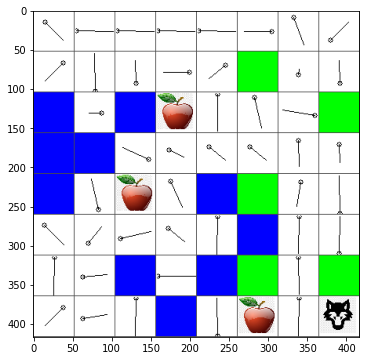

In [43]:
m.plot(Q)

## בדיקת המדיניות

מכיוון ש-Q-Table מציג את "האטרקטיביות" של כל פעולה בכל מצב, קל מאוד להשתמש בו כדי להגדיר את הניווט היעיל בעולם שלנו. במקרה הפשוט ביותר, ניתן פשוט לבחור את הפעולה שמקבילה לערך הגבוה ביותר ב-Q-Table:


In [13]:
# code block 9

2

אם תנסו את הקוד למעלה מספר פעמים, ייתכן שתשימו לב שלפעמים הוא פשוט "נתקע", ותצטרכו ללחוץ על כפתור ה-STOP במחברת כדי להפסיק אותו.

> **משימה 1:** ערכו את הפונקציה `walk` כך שתוגבל לאורך מקסימלי של מסלול במספר צעדים מסוים (למשל, 100), וצפו כיצד הקוד למעלה מחזיר ערך זה מדי פעם.

> **משימה 2:** ערכו את הפונקציה `walk` כך שהיא לא תחזור למקומות שבהם כבר הייתה בעבר. זה ימנע מהפונקציה `walk` להיכנס ללולאות, אך עדיין ייתכן שהסוכן ימצא את עצמו "לכוד" במקום שממנו אינו יכול להימלט.


In [58]:

# code block 10

Average path length = 5.31, eaten by wolf: 0 times


## חקירת תהליך הלמידה


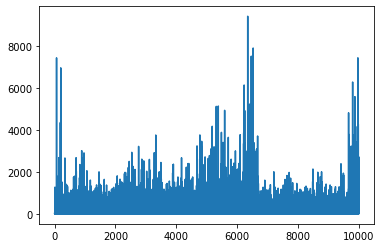

In [57]:
plt.plot(lpath)

## תרגיל
## עולם מציאותי יותר של פיטר והזאב



---

**כתב ויתור**:  
מסמך זה תורגם באמצעות שירות תרגום מבוסס בינה מלאכותית [Co-op Translator](https://github.com/Azure/co-op-translator). למרות שאנו שואפים לדיוק, יש לקחת בחשבון שתרגומים אוטומטיים עשויים להכיל שגיאות או אי-דיוקים. המסמך המקורי בשפתו המקורית נחשב למקור הסמכותי. למידע קריטי, מומלץ להשתמש בתרגום מקצועי על ידי מתרגם אנושי. איננו נושאים באחריות לכל אי-הבנה או פרשנות שגויה הנובעת משימוש בתרגום זה.
